# imtiaz Ahmad 


# Data science intern in Oasis Infobyte||Car predictionnp


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv('car data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [21]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [22]:
df.duplicated().sum()

2

In [23]:
df.drop_duplicates(inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [25]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


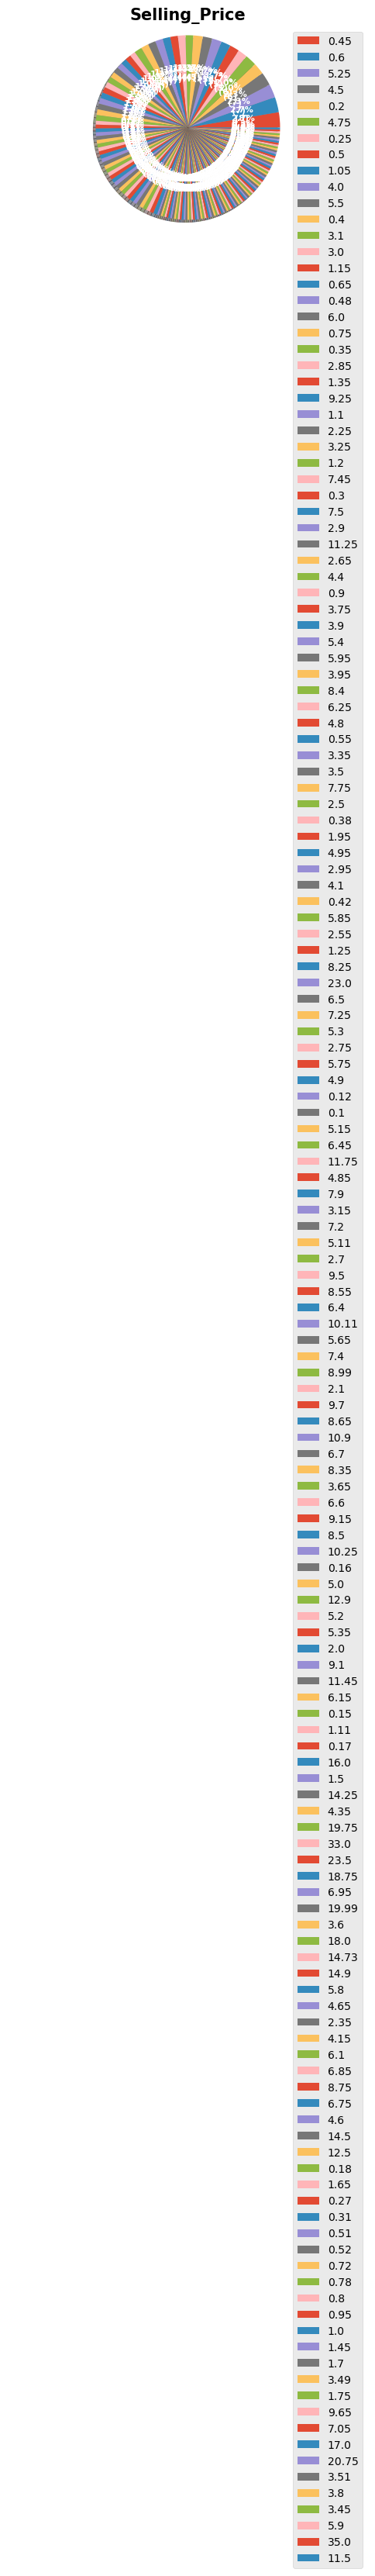

In [58]:
plt.style.use('ggplot')

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig,ax = plt.subplots(figsize = (6,3.4))

df_class = df['Selling_Price'].value_counts().to_frame()
labels = df_class.index.to_list()
values = df_class.iloc[:,0].to_list()
ax.pie(x = values, labels = labels, autopct=autopct_fun(values), shadow = True, textprops = {'color':'white', 'fontsize':8, 'fontweight':'bold'})
ax.legend(labels, loc = 'best')
ax.set_title('Selling_Price', fontsize = 15, fontweight = "bold", color = "black")
ax.axis('equal')
fig.show()

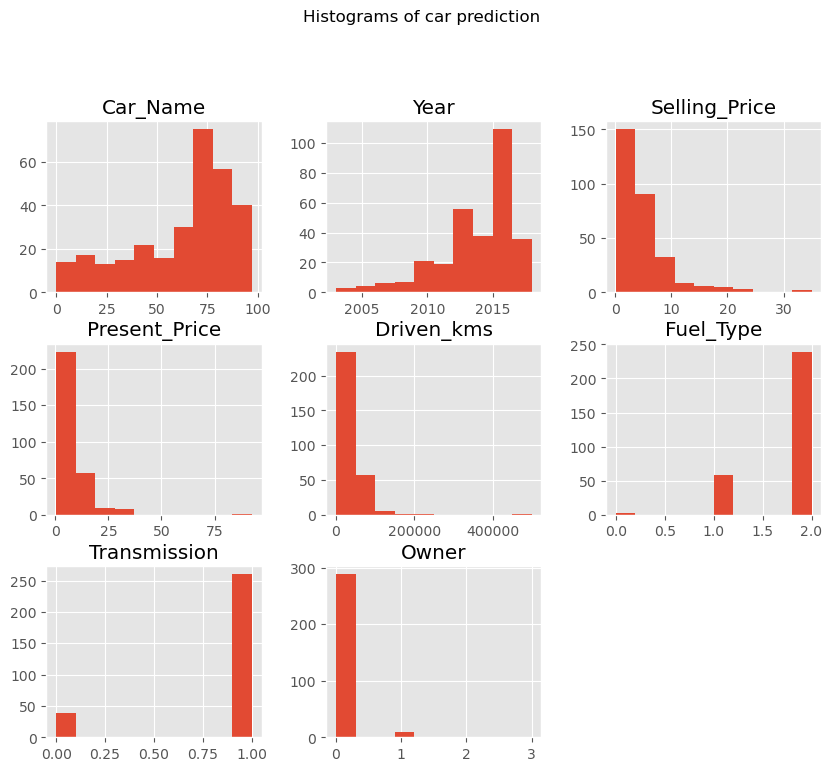

In [59]:
df.hist(figsize=(10, 8))
plt.suptitle('Histograms of car prediction', y=1.02)
plt.show()

In [26]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
Labelencode = LabelEncoder()

In [28]:
cat_vars = df.select_dtypes('O').columns
for i in cat_vars:
    
    df[i] = Labelencode.fit_transform(df[i])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [29]:
df.drop(columns = 'Selling_type',axis = 1,inplace=True)

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,1,0
1,93,2013,4.75,9.54,43000,1,1,0
2,68,2017,7.25,9.85,6900,2,1,0
3,96,2011,2.85,4.15,5200,2,1,0
4,92,2014,4.60,6.87,42450,1,1,0


# Model

In [47]:
Y = df['Selling_Price']
X = df.drop(columns = 'Selling_Price')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 23)

In [54]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)

In [55]:
X_test = scale.transform(X_test)

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2.05
R-squared (R2): 0.87
